K-Means Clustering Metrics:
Accuracy: 0.55
Precision: 0.5384615384615384
Recall: 0.7
F1 Score: 0.6086956521739131
Confusion Matrix:
[[4 6]
 [3 7]]


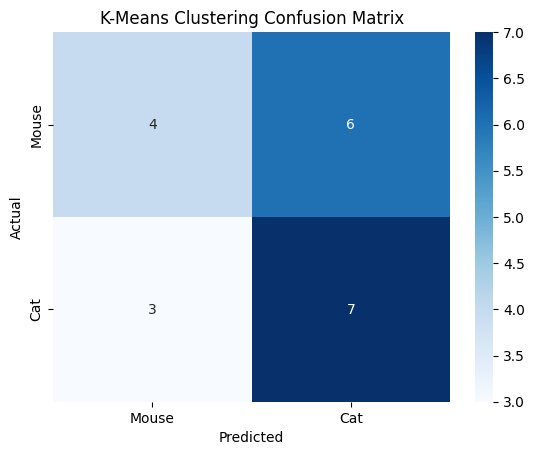


KNN Metrics (Evaluated on Cluster Labels):
Accuracy: 0.95
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629
Confusion Matrix:
[[ 6  1]
 [ 0 13]]

Random Forest Metrics (Evaluated on Cluster Labels):
Accuracy: 0.9
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1 Score: 0.9230769230769231
Confusion Matrix:
[[ 6  1]
 [ 1 12]]

Decision Tree Metrics (Evaluated on Cluster Labels):
Accuracy: 0.9
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1 Score: 0.9230769230769231
Confusion Matrix:
[[ 6  1]
 [ 1 12]]


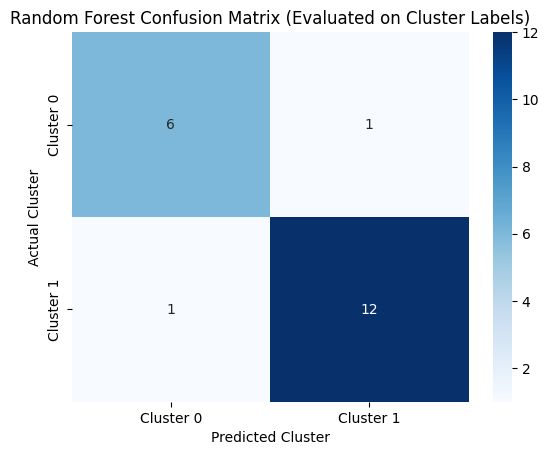

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# file CSV
file_path = '/content/simulation_data_2025-01-11_16-36.csv'

data = pd.read_csv(file_path)

# Estrazione delle caratteristiche e le etichette
features = data[['x_position', 'y_position', 'last_movement_direction']]
labels = data['Agent_kind'].apply(lambda x: 1 if x == 'cat' else 0)

# Converzione della caratteristica categoriale in numerica
features = pd.get_dummies(features, columns=['last_movement_direction'])

# Divisione dei dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standarizzazione dellle caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Means clustering per il training (senza etichette)
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 cluster per gatti e topi
kmeans.fit(X_train)  # Addestramento del clustering sui dati di training

# Le etichette di cluster per i dati di training e test
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

# Valutzione delle prestazioni del clustering sui dati di test
# Confronto delle etichette di cluster con le etichette vere (y_test)
clustering_accuracy = accuracy_score(y_test, test_cluster_labels)
clustering_precision = precision_score(y_test, test_cluster_labels)
clustering_recall = recall_score(y_test, test_cluster_labels)
clustering_f1 = f1_score(y_test, test_cluster_labels)
clustering_cm = confusion_matrix(y_test, test_cluster_labels)

# Stampa le metriche di valutazione per il clustering
print("K-Means Clustering Metrics:")
print(f"Accuracy: {clustering_accuracy}")
print(f"Precision: {clustering_precision}")
print(f"Recall: {clustering_recall}")
print(f"F1 Score: {clustering_f1}")
print("Confusion Matrix:")
print(clustering_cm)

# Visualizzazione della matrice di confusione per il clustering
sns.heatmap(clustering_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K-Means Clustering Confusion Matrix')
plt.show()

# KNN, Random Forest e Decision Tree per valutare le prestazioni del clustering
# Addestramento dei modelli supervisionati sulle etichette di cluster (non sulle etichette vere)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Addestramento dei modelli supervisionati usando le etichette di cluster come target
knn.fit(X_train, train_cluster_labels)
rf.fit(X_train, train_cluster_labels)
dt.fit(X_train, train_cluster_labels)

# Effettua le predizioni sui dati di test
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

# Funzione per valutare i modelli
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

# Valutazione dei modelli supervisionati rispetto alle etichette di cluster
knn_metrics = evaluate_model(test_cluster_labels, knn_pred)
rf_metrics = evaluate_model(test_cluster_labels, rf_pred)
dt_metrics = evaluate_model(test_cluster_labels, dt_pred)

# Stampa le metriche di valutazione per ciascun modello
print("\nKNN Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {knn_metrics[0]}")
print(f"Precision: {knn_metrics[1]}")
print(f"Recall: {knn_metrics[2]}")
print(f"F1 Score: {knn_metrics[3]}")
print("Confusion Matrix:")
print(knn_metrics[4])

print("\nRandom Forest Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {rf_metrics[0]}")
print(f"Precision: {rf_metrics[1]}")
print(f"Recall: {rf_metrics[2]}")
print(f"F1 Score: {rf_metrics[3]}")
print("Confusion Matrix:")
print(rf_metrics[4])

print("\nDecision Tree Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {dt_metrics[0]}")
print(f"Precision: {dt_metrics[1]}")
print(f"Recall: {dt_metrics[2]}")
print(f"F1 Score: {dt_metrics[3]}")
print("Confusion Matrix:")
print(dt_metrics[4])

# Matrice di confusione per Random Forest come esempio
cm_rf = rf_metrics[4]
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Cluster 0", "Cluster 1"])
plt.ylabel('Actual Cluster')
plt.xlabel('Predicted Cluster')
plt.title('Random Forest Confusion Matrix (Evaluated on Cluster Labels)')
plt.show()